# Practice notebook for confidence intervals using NHANES data

This notebook will give you the opportunity to practice working with confidence intervals using the NHANES data.

You can enter your code into the cells that say "enter your code here", and you can type responses to the questions into the cells that say "Type Markdown and Latex".

Note that most of the code that you will need to write below is very similar to code that appears in the case study notebook.  You will need to edit code from that notebook in small ways to adapt it to the prompts below.

To get started, we will use the same module imports and read the data in the same way as we did in the case study:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm

da = pd.read_csv("nhanes_2015_2016.csv")

## Question 1

Restrict the sample to women between 35 and 50, then use the marital status variable [DMDMARTL](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#DMDMARTL) to partition this sample into two groups - women who are currently married, and women who are not currently married.  Within each of these groups, calculate the proportion of women who have completed college.  Calculate 95% confidence intervals for each of these proportions.

In [23]:
da["RIAGENDRx"] = da.RIAGENDR.replace({1: "Male", 2: "Female"})
dx = da.loc[(da.RIAGENDRx == 'Female') & (da.RIDAGEYR >= 35) & (da.RIDAGEYR <= 50), :]
dx['Marr'] = da.DMDMARTL.replace({1: "Married", 5: "Non Married"})

dx.head()
dd = dx[["RIAGENDRx", "Marr", 'DMDEDUC2']].dropna() 
dd.head()

nm = dd.loc[(dd.Marr == 'Married')].shape[0]
nn = dd.loc[(dd.Marr == 'Non Married')].shape[0]
scm = dd.loc[(dd.Marr == 'Married') & (dd.DMDEDUC2 == 5)].shape[0]/(nn+nm)
scnn = dd.loc[(dd.Marr == 'Non Married') & (dd.DMDEDUC2 == 5)].shape[0]/(nn+nm)
print('Proportions \n', scnn, scm)

se_nm = np.sqrt(scm * (1 - scm) / nm)
se_nmn = np.sqrt(scnn * (1 - scnn) / nn)
print('Desviations \n', se_nm, se_nmn)

Proportions 
 0.0549645390070922 0.2872340425531915
Desviations 
 0.021353460173059922 0.02125281330918436


In [24]:
lcm = scm - 1.96 * np.sqrt(scm * (1 - scm)/ nm)  
ucm = scm + 1.96 * np.sqrt(scm * (1 - scm) / nm) 
print('Married CI', lcm, ucm)

lcn = scnn - 1.96 * np.sqrt(scnn * (1 - scnn) / nn)  
ucn = scnn + 1.96 * np.sqrt(scnn * (1 - scnn) / nn) 
print('Non Married CI', lcn, ucn)

Married CI 0.24538126061399407 0.32908682449238896
Non Married CI 0.013309024921090852 0.09662005309309354


__Q1a.__ Identify which of the two confidence intervals is wider, and explain why this is the case. 

__Q1b.__ Write 1-2 sentences summarizing these findings for an audience that does not know what a confidence interval is (the goal here is to report the substance of what you learned about how marital status and educational attainment are related, not to teach a person what a confidence interval is).

## Question 2

Construct a 95% confidence interval for the proportion of smokers who are female. Construct a 95% confidence interval for the proportion of smokers who are male. Construct a 95% confidence interval for the **difference** between those two gender proportions.

In [31]:
da["SMQ020x"] = da.SMQ020.replace({1: "Yes", 2: "No", 7: np.nan, 9: np.nan})  # np.nan represents a missing value
da["RIAGENDRx"] = da.RIAGENDR.replace({1: "Male", 2: "Female"})

dx = da[["SMQ020x", "RIAGENDRx"]].dropna()  # dropna drops cases where either variable is missing
pd.crosstab(dx.SMQ020x, dx.RIAGENDRx, margins=True)
ms = 1413/2753
fs = 906/2972

lcm = ms - 1.96 * np.sqrt(ms * (1 - ms)/ 2753)  
ucm = ms + 1.96 * np.sqrt(scm * (1 - scm) / 2753) 
print('Married CI', lcm, ucm)

lcf = fs - 1.96 * np.sqrt(fs * (1 - fs) / 2972)  
ucf = fs + 1.96 * np.sqrt(fs * (1 - fs) / 2972) 
print('Non Married CI', lcf, ucf)

sem = np.sqrt(ms * (1 - ms)/ 2753)
sef = np.sqrt(fs * (1 - fs) / 2972) 

se_diff = np.sqrt(sem**2 + sef**2)
se_diff

d = ms - fs # diffe entre proporciones
lcb = d - 2 * se_diff
ucb = d + 2 * se_diff
print('Differences among genders \n',lcb, ucb)


Married CI 0.49458714955108174 0.5301605088261957
Non Married CI 0.288294683866098 0.32139576027925865
Differences among genders 
 0.18295327887682067 0.2338728044024504


__Q2a.__ Why might it be relevant to report the separate gender proportions **and** the difference between the gender proportions?

__Q2b.__ How does the **width** of the confidence interval for the difference between the gender proportions compare to the widths of the confidence intervals for the separate gender proportions?

## Question 3

Construct a 95% interval for height ([BMXHT](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BMX_I.htm#BMXHT)) in centimeters.  Then convert height from centimeters to inches by dividing by 2.54, and construct a 95% confidence interval for height in inches.  Finally, convert the endpoints (the lower and upper confidence limits) of the confidence interval from inches to back to centimeters   

In [39]:
da["BMXHT"] = da.BMXHT/2.54 
hm = da.BMXHT.mean()
nh = len(da.BMXHT)

lch = hm - 1.96 * np.sqrt(hm * (1 - hm)/ nh)  
uch = hm + 1.96 * np.sqrt(hm * (1 - hm) / nh) 
print('Height by inches CI', lch, uch)

Height by inches CI 0.6061280554989366 0.6312696643643372


__Q3a.__ Describe how the confidence interval constructed in centimeters relates to the confidence interval constructed in inches.

In [ ]:
da.BMXBMI

## Question 4

Partition the sample based on 10-year age bands, i.e. the resulting groups will consist of people with ages from 18-28, 29-38, etc. Construct 95% confidence intervals for the difference between the mean BMI for females and for males within each age band.

In [53]:
# Calculate the smoking rates within age/gender groups
da["agegrp"] = pd.cut(da.RIDAGEYR, [18, 28, 38, 48, 58, 68, 78, 88])
pr = da.groupby(["agegrp", "RIAGENDRx"]).agg({"BMXBMI": lambda x: np.mean(x)}).unstack()
pr.columns = ["Female", "Male"]
print(pr)

# The number of people for each calculated proportion
dn = da.groupby(["agegrp", "RIAGENDRx"]).agg({"BMXBMI": np.size}).unstack()
dn.columns = ["Female", "Male"]
print(dn)

# Standard errors for each proportion
prse = da.groupby(["agegrp", "RIAGENDRx"]).agg({"BMXBMI": lambda x: np.std(x)}).unstack()
prse.columns = ["Female", "Male"]
print(prse)

se = pr/np.sqrt(dn)
print(se)

# Standard error for the difference in female/male smoking rates in every age band
se_diff = np.sqrt(se.Female**2 + se.Male**2)
print(se_diff)
# Standard errors for the difference in smoking rates between genders, within age bands

             Female       Male
agegrp                        
(18, 28]  28.019433  27.058186
(28, 38]  29.943443  29.697180
(38, 48]  31.003733  29.514646
(48, 58]  30.787361  29.385132
(58, 68]  31.054664  29.232462
(68, 78]  30.537818  28.720270
(78, 88]  27.850000  27.464368
          Female   Male
agegrp                 
(18, 28]   498.0  458.0
(28, 38]   494.0  467.0
(38, 48]   514.0  398.0
(48, 58]   454.0  419.0
(58, 68]   466.0  470.0
(68, 78]   279.0  307.0
(78, 88]   201.0  177.0
            Female      Male
agegrp                      
(18, 28]  8.040703  6.672122
(28, 38]  7.950938  6.719391
(38, 48]  8.036736  6.097237
(48, 58]  7.639107  6.144153
(58, 68]  7.771060  5.952529
(68, 78]  6.768249  5.327630
(78, 88]  5.469915  4.682137
            Female      Male
agegrp                      
(18, 28]  1.255581  1.264346
(28, 38]  1.347219  1.374222
(38, 48]  1.367516  1.479436
(48, 58]  1.444922  1.435558
(58, 68]  1.438580  1.348393
(68, 78]  1.828251  1.639152
(78, 88]  1.

Text(0,0.5,'Female - male smoking proportion')

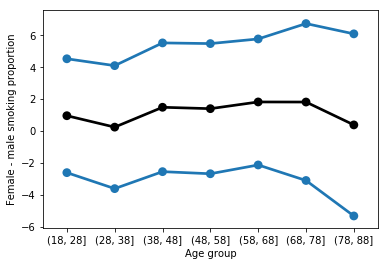

In [54]:
pq = pr.Female - pr.Male

x = np.arange(pq.size)
pp = sns.pointplot(x, pq.values, color='black')
sns.pointplot(x, pq - 2*se_diff)
sns.pointplot(x, pq + 2*se_diff)
pp.set_xticklabels(pq.index)
pp.set_xlabel("Age group")
pp.set_ylabel("Female - male smoking proportion")

__Q4a.__ How do the widths of these confidence intervals differ?  Provide an explanation for any substantial diferences in the confidence interval widths that you see.

## Question 5

Construct a 95% confidence interval for the first and second systolic blood pressure measures, and for the difference between the first and second systolic blood pressure measurements within a subject.

In [ ]:
# enter code here

__Q5a.__ Based on these confidence intervals, would you say that a difference of zero between the population mean values of the first and second systolic blood pressure measures is consistent with the data?

__Q5b.__ Discuss how the width of the confidence interval for the within-subject difference compares to the widths of the confidence intervals for the first and second measures.

## Question 6

Construct a 95% confidence interval for the mean difference between the average age of a smoker, and the average age of a non-smoker.

In [71]:
print(da.groupby("SMQ020x").agg({"RIDAGEYR": [np.mean, np.std, np.size]}))

sq = 17.46 / np.sqrt(2319)
ns = 18.54 / np.sqrt(3406)
print(sq, ns)

sem_diff = np.sqrt(sq**2 + ns**2)
sem_diff

ds = da.loc[da.SMQ020x=='Yes', "RIDAGEYR"]
dn = da.loc[da.SMQ020x=='No', "RIDAGEYR"]

sm.stats.CompareMeans.from_data(ds, dn)

          RIDAGEYR                 
              mean        std  size
SMQ020x                            
No       45.259836  18.543286  3406
Yes      52.096593  17.461141  2319
0.3625716684294791 0.3176781961181817


__Q6a.__ Use graphical and numerical techniques to compare the variation in the ages of smokers to the variation in the ages of non-smokers.  

In [1]:
# insert your code here

__Q6b.__ Does it appear that uncertainty about the mean age of smokers, or uncertainty about the mean age of non-smokers contributed more to the uncertainty for the mean difference that we are focusing on here?